# SAT Scores data set

### Introduction

The Wakandan Institute of Technology (WIT) wishes to assess the effectiveness of their admission criteria. The main question was: How predictive are SAT score of students' success over their first year. For this, WIT's chief officer of statistics gathered a random sample of 670 newly admitted students.

Each student in the sample took 4 basic STEM courses in the first semester:
- Calculus 1
- Introduction to Computer Science
- Classical Mechanics
- Introduction to Biology

For each student, his/her SAT scores, prior to admission, were recorded. Moreover, at the end of the first semester, the grade of each of the four courses above were marked for every students.

The data appears in the file 'SAT.csv'.

Your job is to analyze the data and prove that there is no connection between SAT scores and grades in first years courses. 
However, if you choose to, you may also try to convince of any possible meaningful and informative connection between the SAT scores and the grades in the courses.


### Notebook

The following imports always make sense.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

You may now read the data file.

In [3]:
data = pd.read_csv("SAT.csv")

Each row of the data represents a single student.

You may use the rest of the notebook for your analysis.

In [4]:
for col in data.columns:
    print("\"" + col + "\"")

"SAT score"
"Unnamed: 1"
"Unnamed: 2"
"Calculus I final score"
"Introduction to Computer Science final score"
"Classical Mechanics final score"
"Introduction to Biology final score"


In [5]:
data.drop(['Unnamed: 1', 'Unnamed: 2'], inplace=True, axis=1)

In [8]:
data = data.rename(columns={'SAT score': 'SAT', 
                        'Calculus I final score': 'WIT_1',
                        'Introduction to Computer Science final score': 'WIT_2',
                        'Classical Mechanics final score': 'WIT_3',
                        'Introduction to Biology final score': 'WIT_4',
                       })


In [9]:
print(data)

      SAT  WIT_1  WIT_2  WIT_3  WIT_4
0    1547     78     75     81     68
1    1521     70     78     74     94
2    1471     76     88     67     95
3    1532     70     71     46     67
4    1554     82     69     65     86
..    ...    ...    ...    ...    ...
665  1535     73     76     71     82
666  1503     87     75     77     85
667  1492     76     71     77     76
668  1487     92     75     65     71
669  1565     67     72     72     86

[670 rows x 5 columns]


In [11]:
print(data['SAT'])

0      1547
1      1521
2      1471
3      1532
4      1554
       ... 
665    1535
666    1503
667    1492
668    1487
669    1565
Name: SAT, Length: 670, dtype: int64


In [12]:
print(data.loc[0])

SAT      1547
WIT_1      78
WIT_2      75
WIT_3      81
WIT_4      68
Name: 0, dtype: int64


Attempting correlation test from here: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

In [13]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed


"""
Already have the following imports

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
"""

'\nAlready have the following imports\n\nimport pandas as pd\nimport numpy as np\nimport statsmodels.api as sm\nimport matplotlib.pyplot as plt\n'

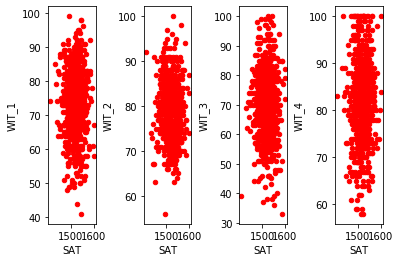

In [53]:
#plotting them all together wasn't very good for visualization

figure, axes = plt.subplots(1, 4)
data.plot(kind='scatter',x='SAT',y='WIT_1',color='red', ax=axes[0])
data.plot(kind='scatter',x='SAT',y='WIT_2',color='red', ax=axes[1])
data.plot(kind='scatter',x='SAT',y='WIT_3',color='red', ax=axes[2])
data.plot(kind='scatter',x='SAT',y='WIT_4',color='red', ax=axes[3])

plt.subplots_adjust(wspace=1, hspace=1)


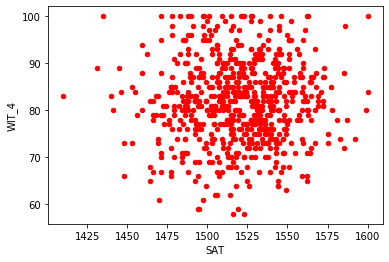

In [43]:
#works a lot better, just change y='WIT_n' to n = 1,2,3,4 as you need

data.plot(kind='scatter',x='SAT',y='WIT_4',color='red')
plt.show()

References on statsmodels.api:
https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
https://stackoverflow.com/questions/57385279/what-is-the-difference-between-statsmodels-api-sm-ols-and-statsmodels-formula-ap


Why a t-test for linear regression?
https://stats.stackexchange.com/questions/344006/understanding-t-test-for-linear-regression

In [42]:
"""
Computing the covariance matrix of the data:
    - WIT_1 = Calc 1
    - WIT_2 = Intro to CS
    - WIT_3 = Classical Mechanics
    - WIT_4 = Intro to Bio

Ref
https://www.w3resource.com/pandas/dataframe/dataframe-cov.php#:~:text=Compute%20the%20pairwise%20covariance%20among,the%20columns%20of%20the%20DataFrame.&text=Minimum%20number%20of%20observations%20required,to%20have%20a%20valid%20result.
"""

data.cov()

,SAT,WIT_1,WIT_2,WIT_3,WIT_4
SAT,838.270120,-2.426067,-10.198055,0.964233,6.118167
WIT_1,-2.426067,96.046083,-1.764219,-3.649640,-1.105316
WIT_2,-10.198055,-1.764219,39.477536,1.397068,3.165888
WIT_3,0.964233,-3.649640,1.397068,135.062276,-2.639765
WIT_4,6.118167,-1.105316,3.165888,-2.639765,76.607994


In [38]:
X = data['SAT']
Y = data['WIT_3']

In [41]:
"""
Computing correlation coefficients: https://realpython.com/numpy-scipy-pandas-correlation-python/#example-pandas-correlation-calculation
"""

print(X.corr(Y)) #Pearson's R
print(X.corr(Y, method='spearman')) #Spearman's rho
print(X.corr(Y, method='kendall')) #Kendall's Tau

0.0028656477633797793
0.002703768789763327
0.0017296243071415562


In [35]:
X = sm.add_constant(X)


model = sm.OLS(Y,X)
#model = sm.OLS(np.log(Y),X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  WIT_3   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.005486
Date:                Tue, 12 Apr 2022   Prob (F-statistic):              0.941
Time:                        00:01:15   Log-Likelihood:                -2593.6
No. Observations:                 670   AIC:                             5191.
Df Residuals:                     668   BIC:                             5200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.9599     23.599      2.880      0.0

In [36]:
print(results.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            67.9599     23.599      2.880      0.004      21.622     114.297
